In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # standardize
from sklearn.model_selection import train_test_split
SEED = 100
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data Cleaning

In [4]:
df = pd.read_csv('train.csv')
df.head(10)

,uniqueid,year,personid,x1,x2,x3,x4,x5,x6,x7,...,x1197,x1198,x1199,x1200,x1201,x1202,x1203,x1204,x1205,health
0,20053999,2005,3999,5.0,3.0,5.0,4.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,2,160,1.0,4.0,NaN,2
1,20053997,2005,3997,3.0,3.0,3.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,140,3.0,5.0,NaN,3
2,20053996,2005,3996,4.0,4.0,3.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,140,3.0,5.0,NaN,5
3,20053995,2005,3995,3.0,2.0,3.0,3.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,2,150,1.0,5.0,NaN,3
4,20053993,2005,3993,4.0,2.0,4.0,4.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,2,130,5.0,8.0,NaN,3
5,20053992,2005,3992,4.0,3.0,4.0,3.0,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,1,30,1.0,7.0,NaN,3
6,20053991,2005,3991,4.0,2.0,3.0,3.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,2,160,1.0,4.0,NaN,1
7,20053990,2005,3990,4.0,5.0,4.0,1.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,2,150,1.0,1.0,NaN,1
8,20053989,2005,3989,5.0,5.0,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,150,1.0,1.0,NaN,4
9,20053988,2005,3988,3.0,3.0,3.0,3.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,2,160,3.0,3.0,NaN,2


In [5]:
X = df.loc[:, ~df.columns.isin(['uniqueid', 'health'])]
y = df['health'].astype(str)

In [6]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)

In [7]:
# drop columns with too many null values

col_too_many_null = []

for i in list(X_train.columns):
    if X_train[i].isna().sum()/len(X_train) >= 0.85:
        col_too_many_null.append(i)

len(col_too_many_null)
X_train = X_train.drop(col_too_many_null, axis=1)
X_test =  X_test.drop(col_too_many_null, axis=1)

In [ ]:
# draft
# pd.set_option('display.max_rows', None)
# X_train['xi7'] = X_train['x7'].fillna(X_train.groupby(['personid'])['x7'].transform('mean'))
# X_train[['personid', 'x7', 'xi7']].sort_values('personid')

# X_train['xi7'] = X_train.groupby('personid')['x7'].transform(lambda x: x.ffill().bfill())
# X_train[['personid', 'year', 'x7', 'xi7']].sort_values('personid')

In [ ]:
# X_train.groupby(['personid', pd.Grouper(key='year')])['x7'].mean().ffill().reset_index()['x7']
# X_train.sort_values('year')
# X_test.sort_values('year')
# for i in X_train.columns:
#     X_train[i] = X_train.groupby('personid')[i].transform(lambda x: x.ffill().bfill())
    
# for i in X_test.columns:
#     X_test[i] = X_test.groupby('personid')[i].transform(lambda x: x.ffill().bfill())    

In [ ]:
# X_train.to_csv('X_train.csv', index=False)
# X_test.to_csv('X_test.csv', index=False)

In [ ]:
# X_train = pd.read_csv('X_train.csv')
# X_test = pd.read_csv('X_test.csv')

In [ ]:
# import sys
# !{sys.executable} -m pip install missingpy

In [8]:
X_train['x3'].mode()

0    3.0
dtype: float64

In [9]:
# Impute null value with mode
for i in list(X_train.columns):
    X_train[i] = X_train[i].fillna(X_train[i].mode()[0])
for i in list(X_test.columns):
    X_test[i] = X_test[i].fillna(X_test[i].mode()[0])

In [ ]:
# train_id_count = X_train.groupby('personid').size().reset_index(name='id_counts')
# test_id_count = X_test.groupby('personid').size().reset_index(name='id_counts')

In [ ]:
# X_train = X_train.merge(train_id_count, on='personid', how='left').drop('id_count', axis=1)

In [ ]:
# X_test = X_test.merge(test_id_count, on='personid', how='left')

In [ ]:
# import sklearn.neighbors._base
# sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [ ]:
# from missingpy import MissForest

# # Make an instance and perform the imputation
# imputer = MissForest(random_state=SEED, max_iter = 3)
# imputer.fit(X_train)
# imputed_train = imputer.transform(X_train)
# imputed_test = imputer.transform(X_test)

In [ ]:
# X_train = pd.DataFrame(imputed_train, columns=X_train.columns)
# X_test = pd.DataFrame(imputed_test, columns = X_test.columns)

In [10]:
print(len(X_train.columns))

# Convert Year column to categorical variable
X_train['year'] = X_train['year'].astype(str)
X_train = pd.get_dummies(X_train, columns=['year'], drop_first = True)
X_test['year'] = X_test['year'].astype(str)
X_test = pd.get_dummies(X_test, columns=['year'], drop_first = True)

print(len(X_train.columns))

766
771


In [11]:
from sklearn.feature_selection import VarianceThreshold
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(X_train)
X_test_remove_variance = sel_variance_threshold.transform(X_test)

In [12]:
print(X_train_remove_variance.shape)

(13048, 771)


In [13]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
sel_mutual = SelectKBest(mutual_info_classif, k=50)
X_train_mutual = sel_mutual.fit_transform(X_train_remove_variance, y_train)
X_test_mutual = sel_mutual.transform(X_test_remove_variance)
print(sel_mutual.get_support())

[False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

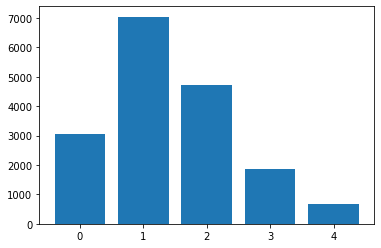

In [15]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
from collections import Counter
import matplotlib.pyplot as plt
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [16]:
dict = Counter(y)

In [17]:
dict

Counter({1: 7040, 2: 4732, 4: 690, 0: 3062, 3: 1874})

# Modelling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_mutual_std = scaler.fit_transform(X_train_mutual)
X_test_mutual_std = scaler.transform(X_test_mutual)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=400)
neigh.fit(X_train_mutual_std, y_train)
neigh.score(X_test_mutual_std, y_test)

0.45839080459770115

In [20]:
# use knn as a feature
X_train_mutual = np.append(X_train_mutual, neigh.predict_proba(X_train_mutual_std), axis =1)
X_test_mutual = np.append(X_test_mutual, neigh.predict_proba(X_test_mutual_std), axis =1)

In [21]:
pd.value_counts(y_train, normalize=True)

2    0.404660
3    0.271996
1    0.175966
4    0.107679
5    0.039700
Name: health, dtype: float64

In [23]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [24]:
# Random Forest method
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_mutual, y_train)
params = {'n_estimators' : [100, 200],
          'max_depth' : [5, 8, 15, 25, 30],
          'min_samples_split' : [5, 10, 15],
          'max_features': range(30, 50),
          'class_weight': ['balanced', None]
}

random_search = RandomizedSearchCV(clf, params, n_iter=7, n_jobs=-1, scoring='neg_log_loss', random_state=0 )
random_search.fit(X_train_mutual, y_train)
clf = random_search.best_estimator_

In [25]:
from  sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf, X_test, y_test, cv=5, scoring='accuracy'))

0.4650574712643678

In [26]:
X_train_mutual.shape

(13048, 55)

In [27]:
svc_clf = SVC(gamma='auto', decision_function_shape='ovr')
svc_clf.fit(X_train_mutual, y_train)
svc_clf.score(X_test_mutual, y_test)

0.4045977011494253

In [28]:
# Logistic Regression model
lr = LogisticRegression(multi_class='auto', max_iter = 10000)
lr.fit(X_train_mutual, y_train)
lr.score(X_test_mutual, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4691954022988506

In [29]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=100)
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'learning_rate': [0.01, 0.05, 0.1]
}

random_search = RandomizedSearchCV(xgb, param_test1, n_iter=5, n_jobs=-1, scoring='neg_log_loss', random_state=100 )
random_search.fit(X_train_mutual, y_train)
xgb = random_search.best_estimator_
np.mean(cross_val_score(xgb, X_test_mutual, y_test, cv=5, scoring='accuracy'))

0.4710344827586207

In [36]:
import six

In [33]:
# catboost
from catboost import CatBoostClassifier
from  sklearn.model_selection import cross_val_score
cat = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.01,
    verbose=False
)

cat.fit(X_train_mutual, y_train)
cat.score(X_test_mutual, y_test)
np.mean(cross_val_score(cat, X_test_mutual, y_test, cv=5, scoring='accuracy'))

0.48022988505747133

In [38]:
# Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# linear = svm.SVC(kernel='linear', C=1, max_iter = 10000, decision_function_shape='ovo').fit(X_train_mutual, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, max_iter = 10000, decision_function_shape='ovo').fit(X_train_mutual, y_train)
# poly = svm.SVC(kernel='poly', degree=3, C=1, max_iter = 10000, decision_function_shape='ovo').fit(X_train_mutual, y_train)
# sig = svm.SVC(kernel='sigmoid', C=1, max_iter = 10000, decision_function_shape='ovo').fit(X_train_mutual, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [40]:
rbf_pred = rbf.predict(X_test_mutual)
accuracy_rbf = rbf.score(X_test_mutual, y_test)

In [41]:
accuracy_rbf

0.4045977011494253

Based on the accuracy score, we can conclude that by using catboost and xgboost model, we can predict a better outcome. 

# Test

In [43]:
test = pd.read_csv('test.csv')
id_column = test['uniqueid']
test = test.drop(['uniqueid'], axis=1)
test = test.drop(col_too_many_null, axis=1)
for i in list(test.columns):
    test[i] = test[i].fillna(test[i].mode()[0])

In [44]:
test['year'] = test['year'].astype(str)
test = pd.get_dummies(test, columns=['year'], drop_first = True)

In [45]:
for col in list(test.columns):
    if col not in list(X_train.columns):
        print(col)
        test= test.drop(col, axis=1)

year_2019


In [46]:
# Perform the same preprocessing steps as we did for train data
test_remove_variance = sel_variance_threshold.transform(test)
test_mutual = sel_mutual.transform(test_remove_variance)
test_mutual_std = scaler.transform(test_mutual)
test_mutual = np.append(test_mutual, neigh.predict_proba(test_mutual_std), axis =1)

In [47]:
result = cat.predict_proba(test_mutual)

In [48]:
result

array([[0.01537515, 0.20272254, 0.55602592, 0.17866287, 0.04721351],
       [0.04423436, 0.19814091, 0.39450697, 0.26828371, 0.09483404],
       [0.44131665, 0.46090017, 0.08249192, 0.01206511, 0.00322615],
       ...,
       [0.36053119, 0.47881173, 0.13132735, 0.02503942, 0.00429031],
       [0.42011919, 0.46141409, 0.09370505, 0.0207811 , 0.00398057],
       [0.06677089, 0.35332486, 0.41025667, 0.12797592, 0.04167165]])

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub

,uniqueid,p1,p2,p3,p4,p5
0,20053998,0.2,0.2,0.2,0.2,0.2
1,20053994,0.2,0.2,0.2,0.2,0.2
2,20053979,0.2,0.2,0.2,0.2,0.2
3,20053976,0.2,0.2,0.2,0.2,0.2
4,20053964,0.2,0.2,0.2,0.2,0.2
...,...,...,...,...,...,...
7437,2019527,0.2,0.2,0.2,0.2,0.2
7438,2019526,0.2,0.2,0.2,0.2,0.2
7439,2019525,0.2,0.2,0.2,0.2,0.2
7440,2019524,0.2,0.2,0.2,0.2,0.2


In [ ]:
sub['p1'] = result[:,0]
sub['p2'] = result[:,1]
sub['p3'] = result[:,2]
sub['p4'] = result[:,3]
sub['p5'] = result[:,4]

In [ ]:
sub

,uniqueid,p1,p2,p3,p4,p5
0,20053998,0.015865,0.211477,0.563534,0.167903,0.041220
1,20053994,0.036917,0.155645,0.371032,0.307595,0.128811
2,20053979,0.472137,0.451669,0.065337,0.008126,0.002732
3,20053976,0.042826,0.294215,0.453955,0.165529,0.043475
4,20053964,0.003668,0.017257,0.123040,0.310135,0.545900
...,...,...,...,...,...,...
7437,2019527,0.311513,0.509461,0.146001,0.028804,0.004222
7438,2019526,0.130028,0.573740,0.240272,0.048842,0.007118
7439,2019525,0.415853,0.451842,0.105718,0.022837,0.003750
7440,2019524,0.412447,0.477296,0.087592,0.019535,0.003130


In [ ]:
sub.to_csv('cat.csv', index = 0)